In [1]:
# Experiment case

# Assuming you know the parameters of the sandy clay and the unsaturated fine sands


In [2]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
from empymod import filters
import pygimli as pg
import sys
sys.path.insert(1, 'src')

# Load function that performs global search in lookup table
from EM1D import EMf_3Lay_HVP, EMf_3Lay_Opt_HVP_cons, EMf_3Lay_HVP_d

In [3]:
# Settings for measurements simulations

# Define hankel filter
filt = filters.key_201_2012() 

# Define EMI instrument geometry
offsets = np.array([2, 4, 8]) # in meters
height = 0.10 # meters height from ground surface to center of coils
freq = 9000 # Frequency in Hz
# Lambda numbers
lambd = filt.base/offsets[:,np.newaxis] 

In [33]:
def rmse(y_obs, y_pred):
    L2 = np.sqrt(np.sum(((y_obs-y_pred)/y_obs)**2))
    return L2

In [4]:
ini_temp = 10
end_temp = 51

T = np.linspace(ini_temp, end_temp, 41, endpoint=False)
sigma_25 = 43
m = 0.020

sigma_bulk = (m * (T - 25) + 1) * sigma_25

In [5]:
# Experiment parameters:
sigma_fs1 = 10 # mS/m sigma fine sand unsaturated
sigma_sc  = 350 # mS/m sigma of sandy clay
h1 = 2 # Thickness of first layer
h2 = 2.4 # Thickness of second layer
depth2 = h1 + h2
dmax = 12

# Temperature at each Time step
T_TS1 = 10
T_TS2 = 20
T_TS3 = 30
T_TS4 = 40
T_TS5 = 50

# Defining sigma_fs2 for each time step
sigma_fs2_TS1 = sigma_bulk[np.argwhere(T == T_TS1)[0][0]]
sigma_fs2_TS2 = sigma_bulk[np.argwhere(T == T_TS2)[0][0]]
sigma_fs2_TS3 = sigma_bulk[np.argwhere(T == T_TS3)[0][0]]
sigma_fs2_TS4 = sigma_bulk[np.argwhere(T == T_TS4)[0][0]]
sigma_fs2_TS5 = sigma_bulk[np.argwhere(T == T_TS5)[0][0]]

# Define EC models
model_TS1 = np.array([sigma_fs1, sigma_fs2_TS1, sigma_sc, sigma_sc])
model_TS2 = np.array([sigma_fs1, sigma_fs2_TS2, sigma_sc, sigma_sc])
model_TS3 = np.array([sigma_fs1, sigma_fs2_TS3, sigma_sc, sigma_sc]) 
model_TS4 = np.array([sigma_fs1, sigma_fs2_TS4, sigma_sc, sigma_sc]) 
model_TS5 = np.array([sigma_fs1, sigma_fs2_TS5, sigma_sc, sigma_sc]) 

depths = np.array([0, -h1, -h1 - h2, -dmax])

# Simulate measurements
# Note: Sigmas in unit of S/m

data_TS1 = EMf_3Lay_HVP(lambd = lambd, sigma1 = sigma_fs1/1000, sigma2 = sigma_fs2_TS1/1000, 
                        sigma3 = sigma_sc/1000, h1 = h1, h2 = h2, height = height, offsets = offsets,
                         freq = freq, filt = filt)

data_TS2 = EMf_3Lay_HVP(lambd = lambd, sigma1 = sigma_fs1/1000, sigma2 = sigma_fs2_TS2/1000, 
                        sigma3 = sigma_sc/1000, h1 = h1, h2 = h2, height = height, offsets = offsets,
                         freq = freq, filt = filt)

data_TS3 = EMf_3Lay_HVP(lambd = lambd, sigma1 = sigma_fs1/1000, sigma2 = sigma_fs2_TS3/1000, 
                        sigma3 = sigma_sc/1000, h1 = h1, h2 = h2, height = height, offsets = offsets,
                         freq = freq, filt = filt)

data_TS4 = EMf_3Lay_HVP(lambd = lambd, sigma1 = sigma_fs1/1000, sigma2 = sigma_fs2_TS4/1000, 
                        sigma3 = sigma_sc/1000, h1 = h1, h2 = h2, height = height, offsets = offsets,
                         freq = freq, filt = filt)

data_TS5 = EMf_3Lay_HVP(lambd = lambd, sigma1 = sigma_fs1/1000, sigma2 = sigma_fs2_TS5/1000, 
                        sigma3 = sigma_sc/1000, h1 = h1, h2 = h2, height = height, offsets = offsets,
                         freq = freq, filt = filt)

In [15]:
# Initialize the forward modelling class 
EMf = EMf_3Lay_Opt_HVP_cons(lambd, height, offsets, freq, filt, sigma1 = sigma_fs1/1000, sigma3 = sigma_sc/1000)

# Define inversion framework from pygimli
invEM = pg.Inversion()
invEM.setForwardOperator(EMf) # set forward operator

transModel = pg.trans.TransLogLU(0.01,3) 
invEM.modelTrans = transModel

# Relative error array
error = 1e-3 # relative error
relativeError = np.ones_like(data_TS1) * error

# Start inversion
model_3Lay_est_TS1 = invEM.run(data_TS1, relativeError, verbose=False)

# Data from estimated model
data_3Lay_est_TS1 = EMf_3Lay_HVP(lambd, 
                             sigma1 = sigma_fs1/1000,
                             sigma2 = model_3Lay_est_TS1[0],
                             sigma3 = sigma_sc/1000,
                             h1 = model_3Lay_est_TS1[1],
                             h2 = model_3Lay_est_TS1[2],
                             height = height,
                             offsets = offsets,
                             freq = freq,
                             filt = filt)

16/04/24 - 01:34:41 - pyGIMLi - INFO - Created startmodel from forward operator: 3, min/max=0.050000/2.000000


In [11]:
# Initialize the forward modelling class 
EMf = EMf_3Lay_Opt_HVP_cons(lambd, height, offsets, freq, filt, sigma1 = sigma_fs1/1000, sigma3 = sigma_sc/1000)

# Define inversion framework from pygimli
invEM = pg.Inversion()
invEM.setForwardOperator(EMf) # set forward operator

transModel = pg.trans.TransLogLU(0.01,3) 
invEM.modelTrans = transModel

# Relative error array
error = 1e-3 # relative error
relativeError = np.ones_like(data_TS1) * error

# Start inversion
model_3Lay_est_TS2 = invEM.run(data_TS2, relativeError, verbose=False)

# Data from estimated model
data_3Lay_est_TS2 = EMf_3Lay_HVP(lambd, 
                             sigma1 = sigma_fs1/1000,
                             sigma2 = model_3Lay_est_TS2[0],
                             sigma3 = sigma_sc/1000,
                             h1 = model_3Lay_est_TS2[1],
                             h2 = model_3Lay_est_TS2[2],
                             height = height,
                             offsets = offsets,
                             freq = freq,
                             filt = filt)

16/04/24 - 01:30:22 - pyGIMLi - INFO - Created startmodel from forward operator: 3, min/max=0.050000/2.000000


In [12]:
# Initialize the forward modelling class 
EMf = EMf_3Lay_Opt_HVP_cons(lambd, height, offsets, freq, filt, sigma1 = sigma_fs1/1000, sigma3 = sigma_sc/1000)

# Define inversion framework from pygimli
invEM = pg.Inversion()
invEM.setForwardOperator(EMf) # set forward operator

transModel = pg.trans.TransLogLU(0.01,3) 
invEM.modelTrans = transModel

# Relative error array
error = 1e-3 # relative error
relativeError = np.ones_like(data_TS3) * error

# Start inversion
model_3Lay_est_TS3 = invEM.run(data_TS3, relativeError, verbose=False)

# Data from estimated model
data_3Lay_est_TS3 = EMf_3Lay_HVP(lambd, 
                             sigma1 = sigma_fs1/1000,
                             sigma2 = model_3Lay_est_TS3[0],
                             sigma3 = sigma_sc/1000,
                             h1 = model_3Lay_est_TS3[1],
                             h2 = model_3Lay_est_TS3[2],
                             height = height,
                             offsets = offsets,
                             freq = freq,
                             filt = filt)

16/04/24 - 01:31:23 - pyGIMLi - INFO - Created startmodel from forward operator: 3, min/max=0.050000/2.000000


In [13]:
# Initialize the forward modelling class 
EMf = EMf_3Lay_Opt_HVP_cons(lambd, height, offsets, freq, filt, sigma1 = sigma_fs1/1000, sigma3 = sigma_sc/1000)

# Define inversion framework from pygimli
invEM = pg.Inversion()
invEM.setForwardOperator(EMf) # set forward operator

transModel = pg.trans.TransLogLU(0.01,3) 
invEM.modelTrans = transModel

# Relative error array
error = 1e-3 # relative error
relativeError = np.ones_like(data_TS4) * error

# Start inversion
model_3Lay_est_TS4 = invEM.run(data_TS4, relativeError, verbose=False)

# Data from estimated model
data_3Lay_est_TS4 = EMf_3Lay_HVP(lambd, 
                             sigma1 = sigma_fs1/1000,
                             sigma2 = model_3Lay_est_TS4[0],
                             sigma3 = sigma_sc/1000,
                             h1 = model_3Lay_est_TS4[1],
                             h2 = model_3Lay_est_TS4[2],
                             height = height,
                             offsets = offsets,
                             freq = freq,
                             filt = filt)

16/04/24 - 01:32:23 - pyGIMLi - INFO - Created startmodel from forward operator: 3, min/max=0.050000/2.000000


In [14]:
# Initialize the forward modelling class 
EMf = EMf_3Lay_Opt_HVP_cons(lambd, height, offsets, freq, filt, sigma1 = sigma_fs1/1000, sigma3 = sigma_sc/1000)

# Define inversion framework from pygimli
invEM = pg.Inversion()
invEM.setForwardOperator(EMf) # set forward operator

transModel = pg.trans.TransLogLU(0.01,3) 
invEM.modelTrans = transModel

# Relative error array
error = 1e-3 # relative error
relativeError = np.ones_like(data_TS5) * error

# Start inversion
model_3Lay_est_TS5 = invEM.run(data_TS5, relativeError, verbose=False)

# Data from estimated model
data_3Lay_est_TS5 = EMf_3Lay_HVP(lambd, 
                             sigma1 = sigma_fs1/1000,
                             sigma2 = model_3Lay_est_TS5[0],
                             sigma3 = sigma_sc/1000,
                             h1 = model_3Lay_est_TS5[1],
                             h2 = model_3Lay_est_TS5[2],
                             height = height,
                             offsets = offsets,
                             freq = freq,
                             filt = filt)

16/04/24 - 01:33:08 - pyGIMLi - INFO - Created startmodel from forward operator: 3, min/max=0.050000/2.000000


16/04/24 - 01:56:12 - matplotlib.backends.backend_ps - WARNING - The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


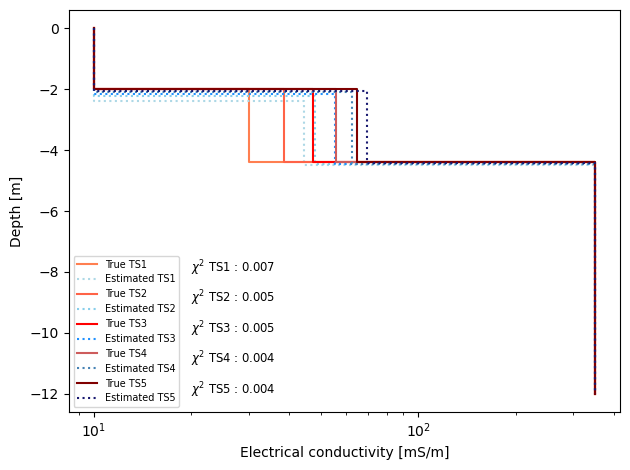

In [42]:
# Plot the models

def PlotModel(model, depths, ax=None, model_name=None, style='-', color='tomato'):
    if ax is None:
        fig, ax = plt.subplots()
    fs=7
    ax.step(model, depths, style, c=color, label=model_name)
    ax.set_xscale('log')
    ax.set_xlabel('Electrical conductivity [mS/m]')
    ax.set_ylabel('Depth [m]')
    if model_name is not None:
        ax.legend(fontsize=fs)
    plt.tight_layout()

# For plots

sigma_est_TS1 = np.array(([sigma_fs1/1000, model_3Lay_est_TS1[0], sigma_sc/1000, sigma_sc/1000]))
depths_est_TS1 = np.array([0, -model_3Lay_est_TS1[1], -model_3Lay_est_TS1[1]-model_3Lay_est_TS1[2], -dmax])

sigma_est_TS2 = np.array(([sigma_fs1/1000, model_3Lay_est_TS2[0], sigma_sc/1000, sigma_sc/1000]))
depths_est_TS2 = np.array([0, -model_3Lay_est_TS2[1], -model_3Lay_est_TS2[1]-model_3Lay_est_TS2[2], -dmax])

sigma_est_TS3 = np.array(([sigma_fs1/1000, model_3Lay_est_TS3[0], sigma_sc/1000, sigma_sc/1000]))
depths_est_TS3 = np.array([0, -model_3Lay_est_TS3[1], -model_3Lay_est_TS3[1]-model_3Lay_est_TS3[2], -dmax])

sigma_est_TS4 = np.array(([sigma_fs1/1000, model_3Lay_est_TS4[0], sigma_sc/1000, sigma_sc/1000]))
depths_est_TS4 = np.array([0, -model_3Lay_est_TS4[1], -model_3Lay_est_TS4[1]-model_3Lay_est_TS4[2], -dmax])

sigma_est_TS5 = np.array(([sigma_fs1/1000, model_3Lay_est_TS5[0], sigma_sc/1000, sigma_sc/1000]))
depths_est_TS5 = np.array([0, -model_3Lay_est_TS5[1], -model_3Lay_est_TS5[1]-model_3Lay_est_TS5[2], -dmax])

fig, ax = plt.subplots()

PlotModel(model_TS1, depths, model_name = 'True TS1', ax=ax, style='-', color='coral')
PlotModel(sigma_est_TS1*1000, depths_est_TS1, model_name='Estimated TS1', ax=ax, style=':', color='lightblue')
ax.text(20, -8, '$\chi^2$ TS1 : ' + "{:1.3f}".format(rmse(data_TS1, data_3Lay_est_TS1)), fontsize='small')

PlotModel(model_TS2, depths, model_name = 'True TS2', ax=ax, style='-', color='tomato')
PlotModel(sigma_est_TS2*1000, depths_est_TS2, model_name='Estimated TS2', ax=ax, style=':', color='skyblue')
ax.text(20, -9, '$\chi^2$ TS2 : ' + "{:1.3f}".format(rmse(data_TS2, data_3Lay_est_TS2)), fontsize='small')

PlotModel(model_TS3, depths, model_name = 'True TS3', ax=ax, style='-', color='red')
PlotModel(sigma_est_TS3*1000, depths_est_TS3, model_name='Estimated TS3', ax=ax, style=':', color='dodgerblue')
ax.text(20, -10, '$\chi^2$ TS3 : ' + "{:1.3f}".format(rmse(data_TS3, data_3Lay_est_TS3)), fontsize='small')

PlotModel(model_TS4, depths, model_name = 'True TS4', ax=ax, style='-', color='indianred')
PlotModel(sigma_est_TS4*1000, depths_est_TS4, model_name='Estimated TS4', ax=ax, style=':', color='steelblue')
ax.text(20, -11, '$\chi^2$ TS4 : ' + "{:1.3f}".format(rmse(data_TS4, data_3Lay_est_TS4)), fontsize='small')

PlotModel(model_TS5, depths, model_name = 'True TS5', ax=ax, style='-', color='maroon')
PlotModel(sigma_est_TS5*1000, depths_est_TS5, model_name='Estimated TS5', ax=ax, style=':', color='midnightblue')
ax.text(20, -12, '$\chi^2$ TS5 : ' + "{:1.3f}".format(rmse(data_TS4, data_3Lay_est_TS4)), fontsize='small')

plt.savefig('figures/Final.eps', format='eps')